# Convergence of 3D tweezer potential

In [1]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2

import numpy as np

## Lifetime fitting

Test case for 1D

/storage/hpc/work/kh30/hw50/DVR/src/dynamics.py:123: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if t is 0:


param_set: model is Gaussian potential.
['x']-reflection symmetry is used.
1D N=20 R0=[3.]w
freq=[39.4]kHz
Gaussian potential starts.
n=[26], dx=[0.15]w, p=[0], model=Gaussian,
t=[0.],
t_step=[0.]
starts.
Matrix size= 53
Estimated full matrix memory usage, float: 0.02 MiB, complex: 0.04 MiB
Parameter setting time: 0.00s.

init_state: initial state of T+0.5V is calculated.
H_mat: n=[26] dx=[0.15]w p=[0] Gaussian starts.
H_mat: H matrix memory usage: 0.04 MiB.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.01s.
H_solver: eigenstates memory usage: 0.04 MiB.
Initial state preparation finished. Time spent: 0.01s.

H_mat: n=[26] dx=[0.15]w p=[0] Gaussian starts.
H_mat: H matrix memory usage: 0.04 MiB.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage: 0.04 MiB.
H_mat: n=[26] dx=[0.15]w p=[0] Gaussian starts.
H_mat: H matrix memory usage: 0.04 MiB.
H_solver: free particle Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage

([<matplotlib.figure.SubFigure at 0x7f3cea3845e0>],
 [[<AxesSubplot:title={'center':'1D Gaussian gs population \nw/ freq=39.400kHz $R_0$=[3.]w'}, xlabel='t/s', ylabel='$\\rho$'>]])

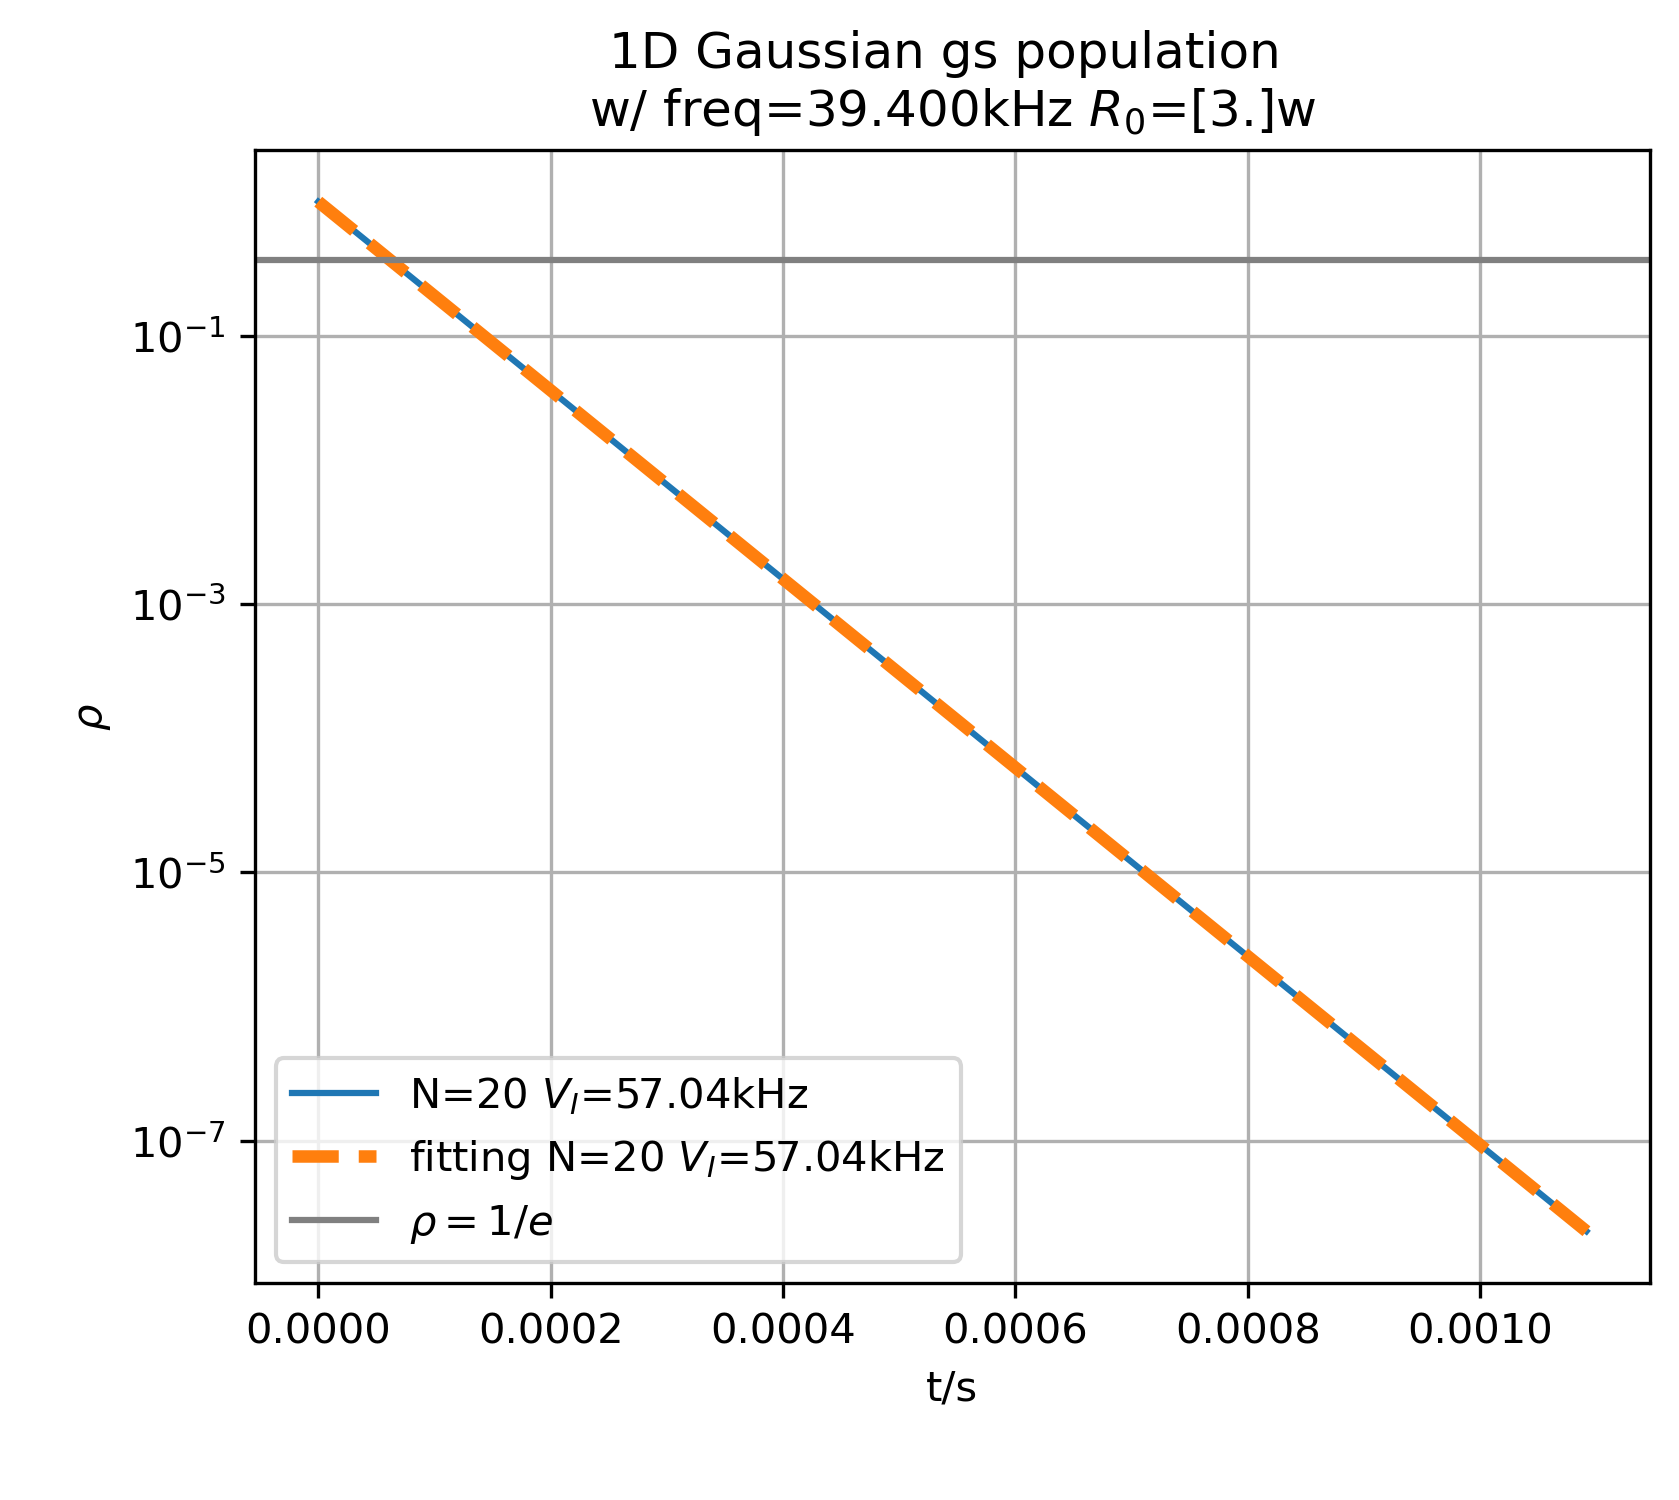

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from DVR_exe import *
import os
from plot_dynamics import *

N = 20
freq = 39.4
os.system(
    'python3 -u dynamics_exe.py -a -n {} -d 1 -m Gaussian -f {}'.format(
        N, freq))
os.system('mv *.h5 ../output')

N_list = range(N, N + 1, 2)
R = 3 * np.array([1, 1, 2.4])
freq_list = np.array([freq])
an = 0
length = 1
sn = 1000.0

p = plot(cvg='N',
         quantity='gs',
         N=N,
         R0=R,
         freq_list=freq_list,
         dim=1,
         model='Gaussian',
         wavefunc=False,
         realtime=False,
         symmetry=True,
         absorber=True)

plot_dynamics(N_list,
              R0_list=[R for i in range(len(N_list))],
              dvr=p,
              length=length,
              avg_no=an,
              fit=True)

3D

param_set: model is Gaussian/tweezer potential.
Time step is set to: 4.25093e-05s.
param_set: model is Gaussian/tweezer potential.
Time step is set to: 0.00198944s.
param_set: model is Gaussian/tweezer potential.
Time step is set to: 0.0857413s.
param_set: model is Gaussian/tweezer potential.
Time step is set to: 3.68994s.


(array([<matplotlib.figure.SubFigure object at 0x7fde1380a0d0>,
       dtype=object),
 [[<AxesSubplot:title={'center':'3D Gaussian gs population \nw/ freq=0.120$V_0/\\hbar$ 117.621kHz $R_0$=[4.  4.  8.2]w'}, xlabel='t/s', ylabel='$\\rho$'>],
  [<AxesSubplot:title={'center':'3D Gaussian gs population \nw/ freq=0.180$V_0/\\hbar$ 176.432kHz $R_0$=[4.  4.  8.2]w'}, xlabel='t/s', ylabel='$\\rho$'>],
  [<AxesSubplot:title={'center':'3D Gaussian gs population \nw/ freq=0.240$V_0/\\hbar$ 235.242kHz $R_0$=[4.  4.  8.2]w'}, xlabel='t/s', ylabel='$\\rho$'>],
  [<AxesSubplot:title={'center':'3D Gaussian gs population \nw/ freq=0.300$V_0/\\hbar$ 294.053kHz $R_0$=[4.  4.  8.2]w'}, xlabel='t/s', ylabel='$\\rho$'>]])

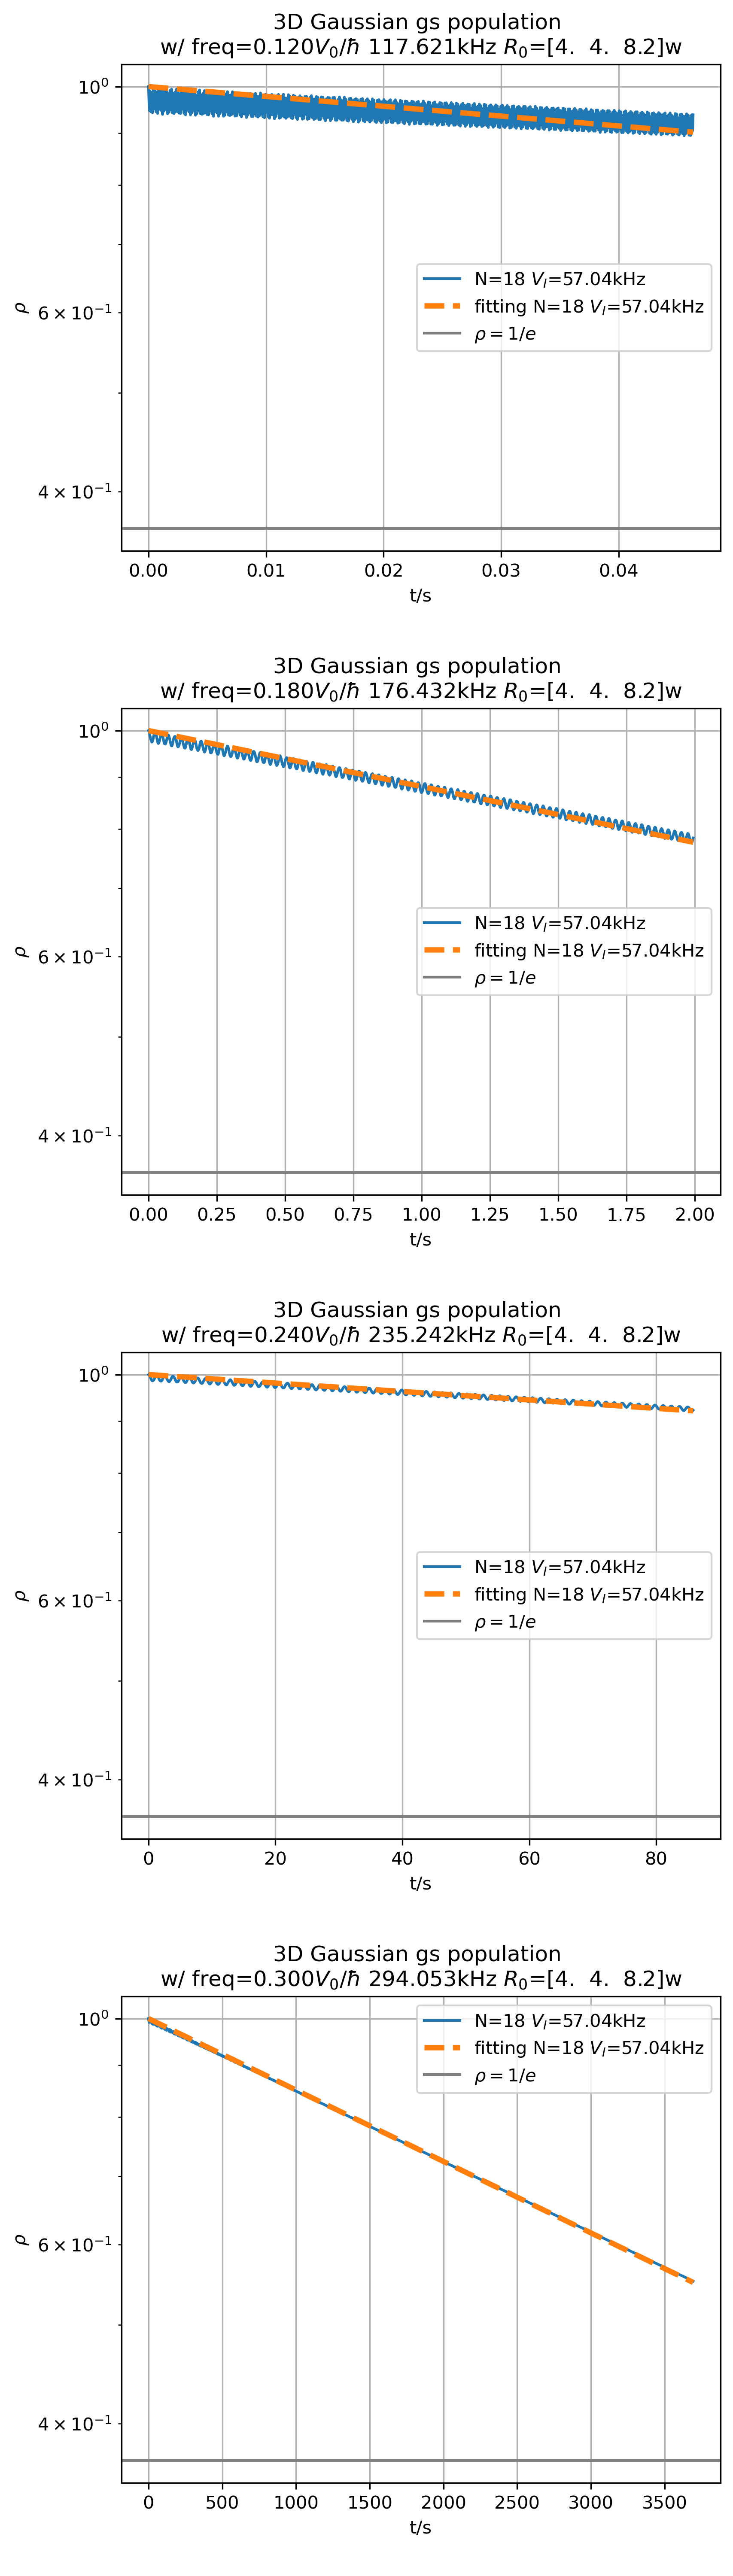

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from DVR_exe import *
import os
from plot_dynamics import plot_dynamics

# N_list = range(16, 21, 2)
N = 18
N_list = range(N, N + 1, 2)
R = 3 * np.array([w, w, 2.4 * w])
L = w
R = R + L
freq_list = np.arange(0.12, 0.36, 0.06)
an = 0
length = 1
st = 5E-5 * np.exp(freq_list * 62.7)
st[np.nonzero(freq_list < .06)] = 1E-3
sn = 1000.0

plot_dynamics(
    N_list,
    R0_list=[R for i in range(len(N_list))],
    freq_list=freq_list,
    stop_time_list=st,
    step_no=sn,
    dim=3,
    length=length,
    avg_no=an,
    model='Gaussian',
    wavefunc=True,
    realtime=False,
    absorber=True,
    #   ab_param=(0.3 * w, 4E5 / V0_SI),
    cvg='N',
    fit=True)

# plot_dynamics(
#     N_list,
#     R0_list=[R for i in range(len(N_list))],
#     freq_list=freq_list,
#     stop_time_list=st,
#     step_no=sn,
#     dim=3,
#     length=length,
#     avg_no=an,
#     model='Gaussian',
#     wavefunc=True,
#     quantity='trap',
#     realtime=False,
#     absorber=True,
#     #   ab_param=(0.3 * w, 4E5 / V0_SI),
#     cvg='N',
#     fit=False)


## Lifetime vs Driving frequency

In [ ]:
from plot_dynamics import *
import numpy as np
import matplotlib.pyplot as plt
from DVR3d_exe import *
import os

N = 18
N_list = range(12, 21, 2)
# N_list = range(N, N + 1, 2)
R = 3 * np.array([w, w, 2.4 * w])
L = w
R = R + L
freq_list = np.arange(0.12, 0.35, 0.04)
length = 1
st = 2.5E-5 * np.exp(freq_list * 62.7)
st[np.nonzero(freq_list < .06)] = 1E-3
# st[np.nonzero(freq_list == .06)] = 2.5E-5 * np.exp(.06 * 62.7)
sn = 1000.0
t0 = 17.9

# os.system('rm *.csv')
ax = plot_lifetime(N_list,
                   R0_list=[R for i in range(len(N_list))],
                   freq_list=freq_list,
                   stop_time_list=st,
                   step_no=sn,
                   symmetry=True,
                   dim=3,
                   tau=t0,
                   file=False,
                   absorber=True,
                   ab_param=(LI, VI0),
                   model='Gaussian',
                   cvg='N')

# plot_lifetime(
#     N_list,
#     R0_list=[R for i in range(len(N_list))],
#     freq_list=freq_list,
#     stop_time_list=st,
#     step_no=sn,
#     ext_ax=ax,
#     dim=3,
#     tau=t0,
#     file=False,
#     absorber=True,
#     ab_param=(0.3 * w, 8E5 * 2 * np.pi / V0_SI),
#     model='Gaussian',
#     quantity='gs',
#     cvg='N')

# plot_lifetime(
#     N_list,
#     R0_list=[R for i in range(len(N_list))],
#     freq_list=freq_list,
#     stop_time_list=st,
#     step_no=sn,
#     ext_ax=ax,
#     dim=3,
#     tau=t0,
#     file=False,
#     absorber=True,
#     # ab_param=(0.3 * w, 4E5 / V0_SI),
#     model='Gaussian',
#     # quantity='gs',
#     quantity='trap',
#     cvg='N')


param_set: model is Gaussian/tweezer potential.
['x' 'y' 'z']-reflection symmetry is used.
Time step is set to: 3.80681e-05s.
param_set: model is Gaussian/tweezer potential.
['x' 'y' 'z']-reflection symmetry is used.
Time step is set to: 3.49024e-05s.
param_set: model is Gaussian/tweezer potential.
['x' 'y' 'z']-reflection symmetry is used.
Time step is set to: 4.25093e-05s.
param_set: model is Gaussian/tweezer potential.
['x' 'y' 'z']-reflection symmetry is used.
Time step is set to: 0.000152272s.
param_set: model is Gaussian/tweezer potential.
['x' 'y' 'z']-reflection symmetry is used.
Time step is set to: 0.000149582s.
param_set: model is Gaussian/tweezer potential.
['x' 'y' 'z']-reflection symmetry is used.
Time step is set to: 0.000160321s.
param_set: model is Gaussian/tweezer potential.
['x' 'y' 'z']-reflection symmetry is used.
Time step is set to: 0.000561504s.
param_set: model is Gaussian/tweezer potential.
['x' 'y' 'z']-reflection symmetry is used.
Time step is set to: 0.0005

<AxesSubplot:title={'center':'Lifetime of 3D Gaussian population @ $R_0$=[4.  4.  8.2]w'}, xlabel='freq/kHz', ylabel='$\\tau/s$'>

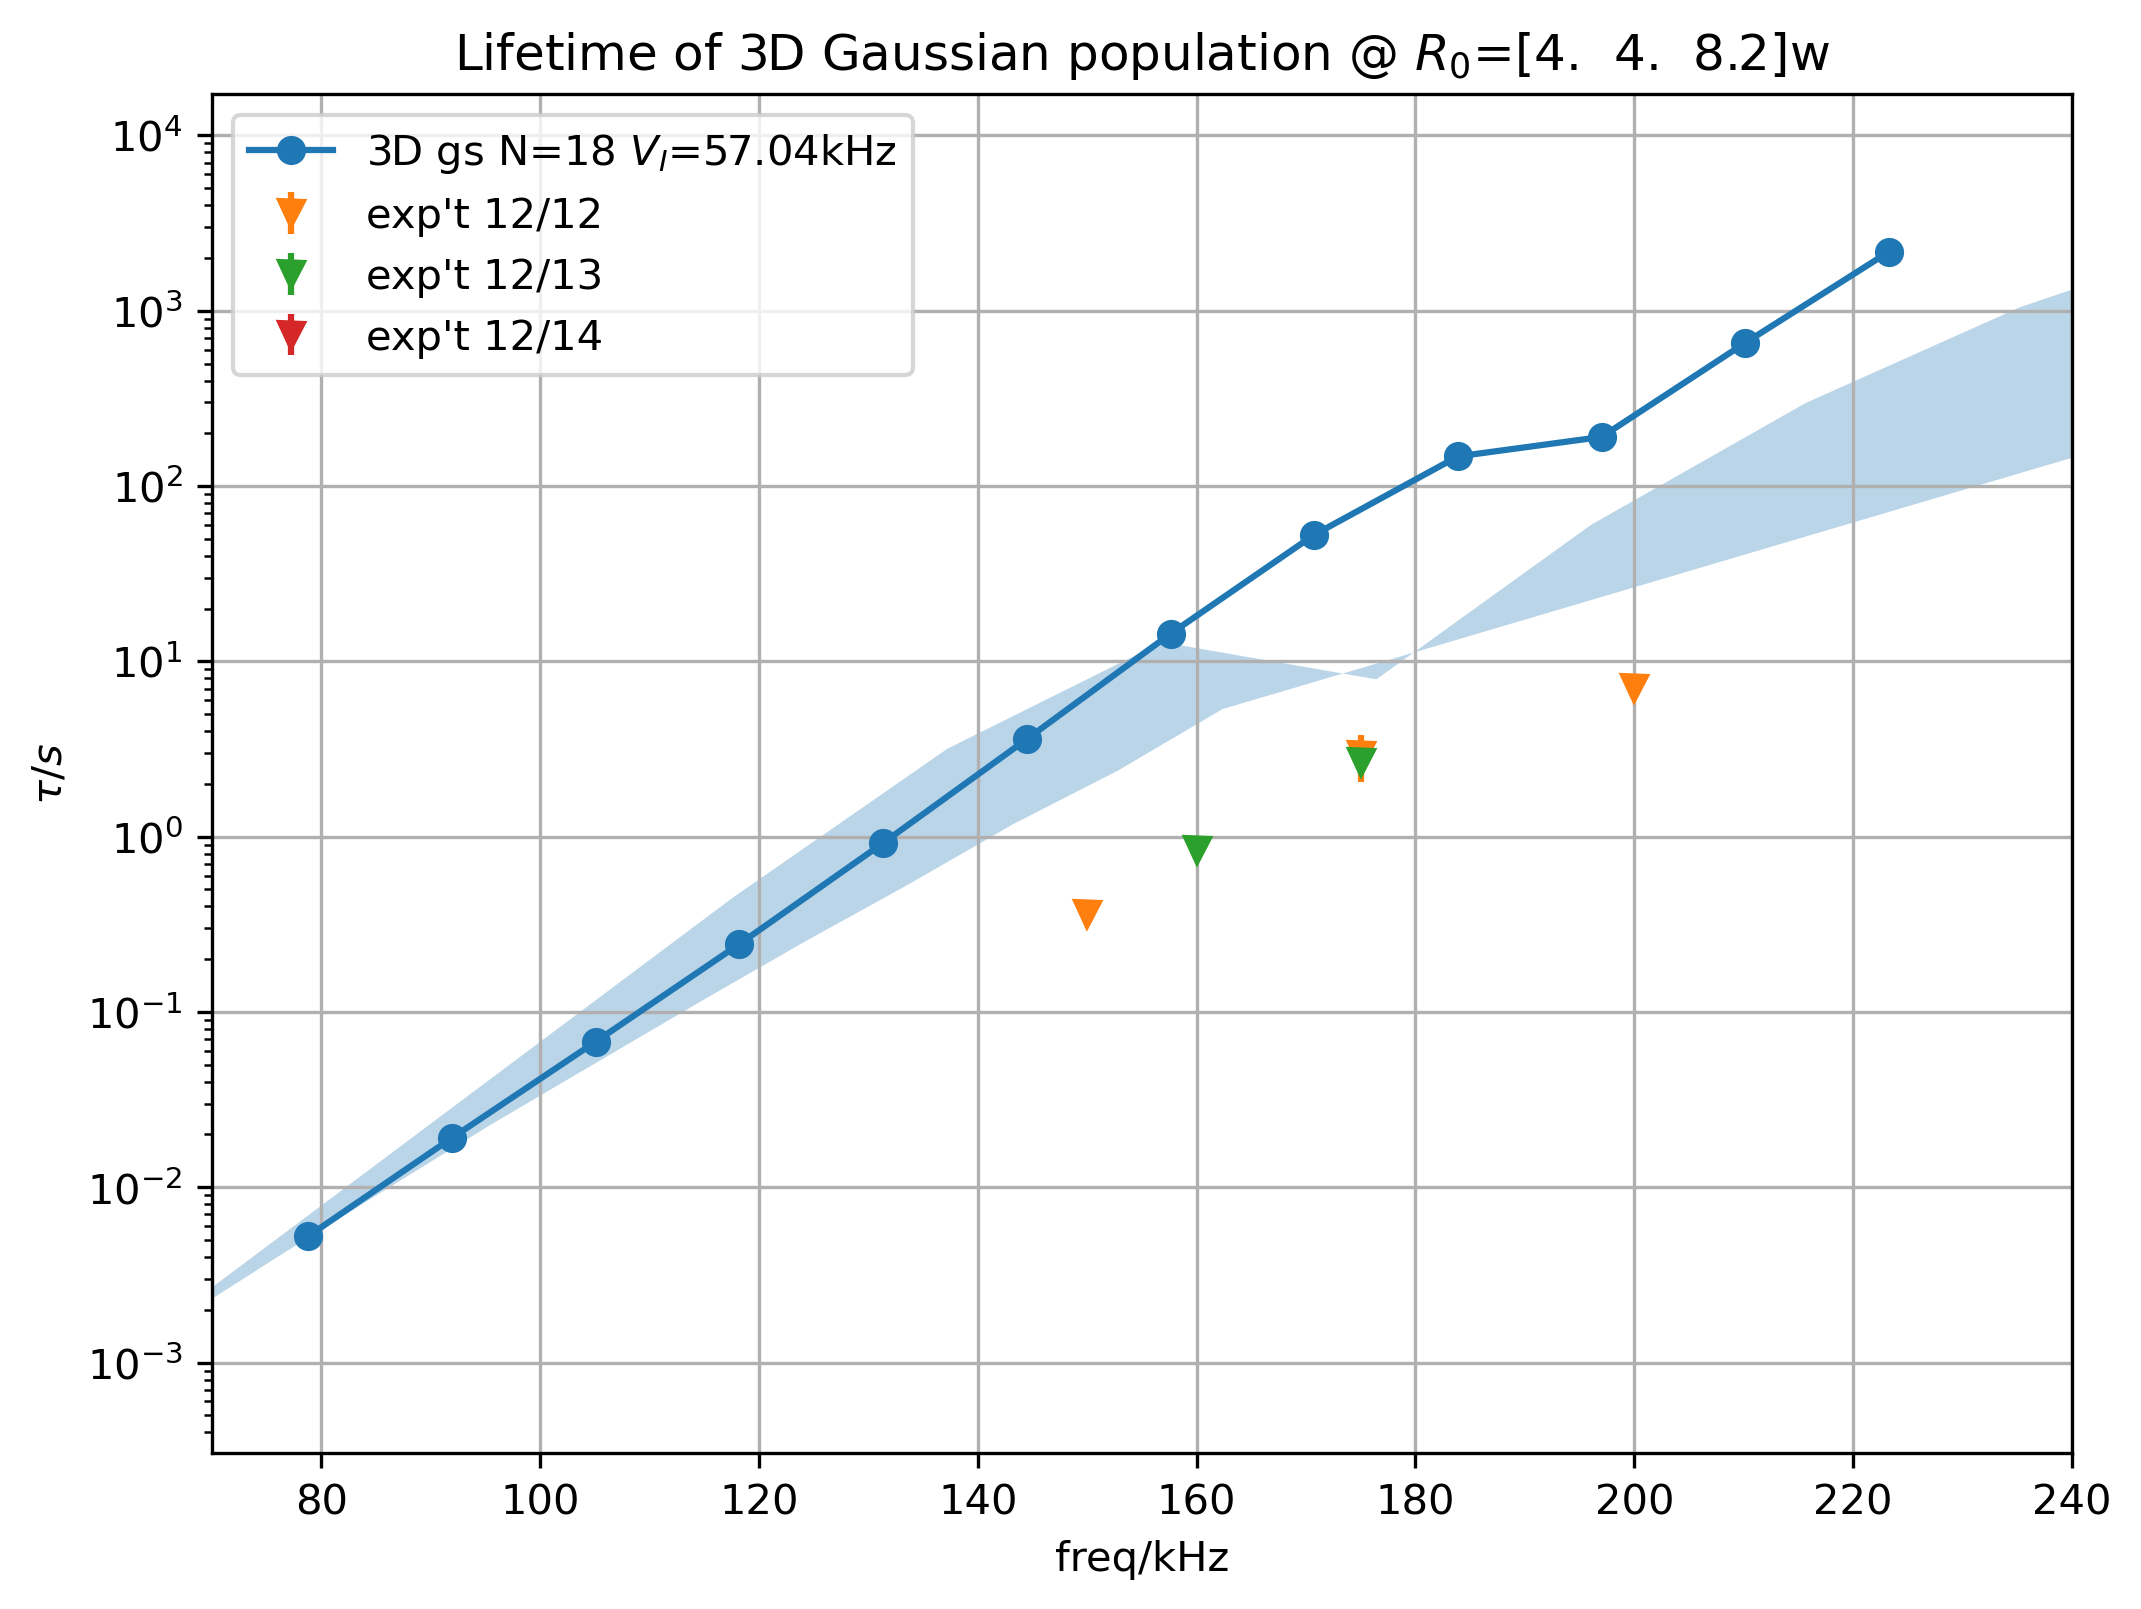

In [1]:
from plot_dynamics import *
import numpy as np
import matplotlib.pyplot as plt
from DVR3d_exe import *
import os

N = 18
# N_list = range(12, 21, 2)
N_list = range(N, N + 1, 2)
R = 3 * np.array([w, w, 2.4 * w])
L = w
R = R + L
freq_list = np.arange(0.12, 0.35, 0.02)
length = 1
st = 2.5E-5 * np.exp(freq_list * 62.7)
st[np.nonzero(freq_list < .06)] = 1E-3
# st[np.nonzero(freq_list == .06)] = 2.5E-5 * np.exp(.06 * 62.7)
sn = 1000.0
t0 = 17.9

# os.system('rm *.csv')
plot_lifetime(
    N_list,
    R0_list=[R for i in range(len(N_list))],
    freq_list=freq_list,
    stop_time_list=st,
    step_no=sn,
    symmetry=True,
    dim=3,
    avg_no=10,
    #   tau=t0,
    file=False,
    err=True,
    absorber=True,
    model='Gaussian',
    cvg='N')


In [ ]:
import numpy as np

N = 10000
a= np.random.rand(N)+ 1j* np.random.rand(N)
f1 = lambda a:np.linalg.norm(a)**2
f2 = lambda a:np.sum(np.abs(a)**2)
f3 = lambda a:np.inner(a.conj(),a).real
print(a.shape)
print(f1(a))
print(f2(a))
print(f3(a))
%timeit f1(a)
%timeit f2(a)
%timeit f3(a)

(10000,)
6627.3637784882285
6627.3637784882285
6627.363778488229


## Wavefunction dynamics

In [ ]:
from plot_dynamics import *
import numpy as np
import matplotlib.pyplot as plt
from DVR3d_exe import *
import os

N_list = range(18, 19, 1)
R = 3 * np.array([w, w, 2.4 * w])
freq_list = np.arange(0.12, 0.26, 0.04)
st = 2.5E-5 * np.exp(freq_list * 62.7)
st[np.nonzero(freq_list < .06)] = 1E-2
sn = 1000.0
plot_wavefunction(N_list,
                  R0_list=[R for i in range(len(N_list))],
                  freq_list=freq_list,
                  stop_time_list=st,
                  length=10,
                  step_no=sn,
                  dim=3,
                  symmetry=True,
                  model='Gaussian',
                  cvg='N',
                  realtime=False,
                  absorber=True)